In [115]:
%matplotlib inline
from ResolveAirport import find_matches

matches = find_matches("London")
scores = [match[0] for match in matches]
list(map(lambda x: "%.3f %s" % (x[0], x[1]["Name"]), matches))

Exact match for airport City London of Chesnut Knolls Airport.
Exact match for airport City London of London / Chapeskie Field.
Exact match for airport City London of Pioneer Airpark.
Exact match for airport City London of London Airport.
Exact match for airport City London of London Luton Airport.
Exact match for airport City London of London Biggin Hill Airport.
Exact match for airport City London of London Gatwick Airport.
Exact match for airport City London of London City Airport.
Exact match for airport City London of London Heathrow Airport.
Exact match for airport City London of London Stansted Airport.
Exact match for airport City London of RAF Northolt.
Exact match for airport City London of London-Corbin Airport/Magee Field.
Exact match for airport City London of Madison County Airport.
Exact match for airport City London of Roberts Airport.


['23.975 London Luton Airport',
 '23.769 London Gatwick Airport',
 '23.760 London Heathrow Airport',
 '23.760 London Stansted Airport',
 '15.866 London City Airport',
 '15.860 London-Corbin Airport/Magee Field',
 '15.794 London Airport',
 '15.700 London Biggin Hill Airport',
 '13.363 RAF Northolt',
 '7.913 London / Chapeskie Field',
 '7.551 Groton New London Airport',
 '6.671 Pioneer Airpark',
 '6.659 Roberts Airport',
 '6.622 Madison County Airport',
 '6.573 Chesnut Knolls Airport',
 '5.076 Ben Schoeman Airport',
 '2.573 D. A. Chandler Airport',
 '2.573 Curns Airport',
 '2.571 Mcfaul Airport',
 "2.559 Mark's Park & Airfield",
 '2.555 Eagles Nest Airport',
 '2.517 Black Dog Farm Airport',
 '2.511 Wolfgram Airport',
 '2.511 North Windham Airport',
 '2.495 Orr-Port Airport',
 '1.384 New London Airport',
 '1.171 Orlando International Airport',
 '1.168 Bodø Airport',
 '1.137 Ontario International Airport',
 '1.113 Donetsk International Airport',
 '1.111 Eindhoven Airport',
 '1.079 Milano L

# Jenks Natural Breaks

In [116]:
from jenks import jenks
clusters = jenks(scores, int(max(3, len(matches)/100)))
clusters

[1.0019974, 2.5734887, 7.9129229, 23.975025]

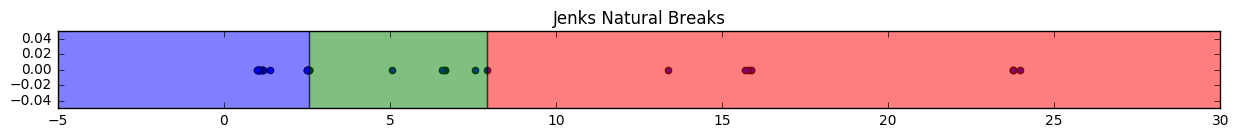

In [117]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from itertools import cycle
cycol = cycle('bgrcymk')

fig = plt.figure(figsize=(15,1))
ax = fig.add_subplot(111)
ax.scatter(scores, [0] * len(matches))

boundaries = clusters
boundaries[0] = -100
boundaries[-1] = 100
for left, right in zip(boundaries, boundaries[1:]):
    ax.add_patch(patches.Rectangle(
            (left, -1), right-left, 2,
            alpha=0.5,
            facecolor=next(cycol)
        ))

plt.title("Jenks Natural Breaks")
plt.show()

### Top cluster:

In [118]:
list(map(lambda x: x[1]["Name"], filter(lambda x: x[0] >= clusters[-2], matches)))

['London Luton Airport',
 'London Gatwick Airport',
 'London Heathrow Airport',
 'London Stansted Airport',
 'London City Airport',
 'London-Corbin Airport/Magee Field',
 'London Airport',
 'London Biggin Hill Airport',
 'RAF Northolt',
 'London / Chapeskie Field']

# MeanShift

In [119]:
from sklearn.cluster import MeanShift, estimate_bandwidth

X = np.array(list(zip(scores, np.zeros(len(scores)))), dtype=np.float)
bandwidth = estimate_bandwidth(X, quantile=0.1)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

ms_clusters = []
for k in range(n_clusters_):
    my_members = labels == k
    print("cluster %i: %s" % (k, str(X[my_members, 0])))
    ms_clusters.append(X[my_members, 0])

cluster 0: [ 1.38406015  1.17137459  1.16819048  1.13683247  1.11311355  1.1106812
  1.0794228   1.04487372  1.02783626  1.02607864  1.02607018  1.01796491
  1.0152381   1.01425328  1.00410719  1.0019973 ]
cluster 1: [ 2.57348872  2.57273684  2.57063158  2.55920301  2.55505263  2.51748872
  2.51099522  2.51062387  2.49499522]
cluster 2: [ 15.8662906   15.86008611  15.79384615  15.69984615]
cluster 3: [ 23.97502564  23.76857875  23.75971176  23.75971176]
cluster 4: [ 6.67101832  6.65872682  6.62177444  6.57263158]
cluster 5: [ 7.55106134]
cluster 6: [ 5.07609854]
cluster 7: [ 7.91292308]
cluster 8: [ 13.36317949]


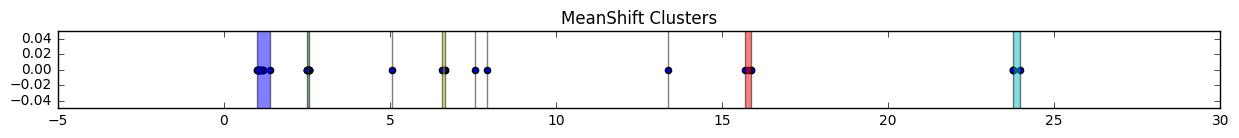

In [120]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from itertools import cycle
cycol = cycle('bgrcymk')

fig = plt.figure(figsize=(15,1))
ax = fig.add_subplot(111)
ax.scatter(scores, [0] * len(matches))

for c in ms_clusters:
    left = min(c)
    right = max(c)
    ax.add_patch(patches.Rectangle(
            (left, -1), right-left, 2,
            alpha=0.5,
            facecolor=next(cycol)
        ))

plt.title("MeanShift Clusters")
plt.show()

### Top cluster

In [121]:
max_cluster = ms_clusters[0]
for c in ms_clusters[1:]:
    if max(c) > max(max_cluster):
        max_cluster = c

list(map(lambda x: x[1]["Name"], filter(lambda x: x[0] >= min(max_cluster), matches)))

['London Luton Airport',
 'London Gatwick Airport',
 'London Heathrow Airport',
 'London Stansted Airport']